<a href="https://colab.research.google.com/github/wilchame/ProyectoIA/blob/main/01_ProyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto IA


A continuación, procedemos a instalar y activar las bibliotecas necesarias que nos permitirán cargar el conjunto de datos desde la plataforma Kaggle utilizando nuestra cuenta de usuario registrada en la competición.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Listar archivos en la carpeta
ruta_carpeta = '/content/drive/MyDrive/IA/PROYECTO'
archivos_en_carpeta = os.listdir(ruta_carpeta)

# Mostrar la lista de archivos
print(archivos_en_carpeta)


['PROYECTO_ENTREGA1.pdf', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv.zip', 'application_test.csv.zip', 'application_train.csv.zip', 'bureau.csv.zip', 'bureau_balance.csv.zip', 'credit_card_balance.csv.zip', 'sample_submission.csv', 'previous_application.csv.zip', 'installments_payments.csv.zip', 'Segunda entrega IA.mp4', 'previous_application.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv']


In [3]:
import zipfile

for archivo in archivos_en_carpeta:
    ruta_archivo = os.path.join(ruta_carpeta, archivo)
    if os.path.isfile(ruta_archivo) and archivo.endswith('.zip'):
        print(f"Descomprimiendo {archivo}...")
        with zipfile.ZipFile(ruta_archivo, 'r') as zip_ref:
            zip_ref.extractall(ruta_carpeta)
        print(f"{archivo} descomprimido.\n")

Descomprimiendo POS_CASH_balance.csv.zip...
POS_CASH_balance.csv.zip descomprimido.

Descomprimiendo application_test.csv.zip...
application_test.csv.zip descomprimido.

Descomprimiendo application_train.csv.zip...
application_train.csv.zip descomprimido.

Descomprimiendo bureau.csv.zip...
bureau.csv.zip descomprimido.

Descomprimiendo bureau_balance.csv.zip...
bureau_balance.csv.zip descomprimido.

Descomprimiendo credit_card_balance.csv.zip...
credit_card_balance.csv.zip descomprimido.

Descomprimiendo previous_application.csv.zip...
previous_application.csv.zip descomprimido.

Descomprimiendo installments_payments.csv.zip...
installments_payments.csv.zip descomprimido.



In [4]:
import os
import zipfile
import pandas as pd

ruta_carpeta = '/content/drive/MyDrive/IA/PROYECTO'
archivos_en_carpeta = os.listdir(ruta_carpeta)

for archivo in archivos_en_carpeta:
    ruta_archivo = os.path.join(ruta_carpeta, archivo)
    if os.path.isfile(ruta_archivo) and archivo.endswith('.zip'):
        print(f"Descomprimiendo {archivo}...")
        with zipfile.ZipFile(ruta_archivo, 'r') as zip_ref:
            zip_ref.extractall(ruta_carpeta)
        print(f"{archivo} descomprimido.")

# Después de descomprimir los archivos, abrir los archivos CSV
for archivo in archivos_en_carpeta:
    if archivo.endswith('.csv'):
        ruta_archivo_csv = os.path.join(ruta_carpeta, archivo)
        try:
            df = pd.read_csv(ruta_archivo_csv, encoding='latin1')
            print(f"Contenido de {archivo}:")
            print(df.head())
        except UnicodeDecodeError:
            print(f"Error al abrir {archivo}: No se puede decodificar con la codificación especificada.")


Descomprimiendo POS_CASH_balance.csv.zip...
POS_CASH_balance.csv.zip descomprimido.
Descomprimiendo application_test.csv.zip...
application_test.csv.zip descomprimido.
Descomprimiendo application_train.csv.zip...
application_train.csv.zip descomprimido.
Descomprimiendo bureau.csv.zip...
bureau.csv.zip descomprimido.
Descomprimiendo bureau_balance.csv.zip...
bureau_balance.csv.zip descomprimido.
Descomprimiendo credit_card_balance.csv.zip...
credit_card_balance.csv.zip descomprimido.
Descomprimiendo previous_application.csv.zip...
previous_application.csv.zip descomprimido.
Descomprimiendo installments_payments.csv.zip...
installments_payments.csv.zip descomprimido.
Contenido de HomeCredit_columns_description.csv:
   Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3        

In [5]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de visualización
plt.style.use('fivethirtyeight')

# Ignorar las advertencias
import warnings
warnings.filterwarnings('ignore')

# Importar herramientas de preprocesamiento y selección de características
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Cargar los conjuntos de datos desde las rutas específicas
application_train = pd.read_csv('/content/drive/MyDrive/IA/PROYECTO/application_train.csv')
application_test = pd.read_csv('/content/drive/MyDrive/IA/PROYECTO/application_test.csv')
bureau = pd.read_csv('/content/drive/MyDrive/IA/PROYECTO/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/IA/PROYECTO/bureau_balance.csv')
credit_card_balance = pd.read_csv('/content/drive/MyDrive/IA/PROYECTO/credit_card_balance.csv')
installments_payments = pd.read_csv('/content/drive/MyDrive/IA/PROYECTO/installments_payments.csv')
POS_CASH_balance = pd.read_csv('/content/drive/MyDrive/IA/PROYECTO/POS_CASH_balance.csv')
previous_application = pd.read_csv('/content/drive/MyDrive/IA/PROYECTO/previous_application.csv')

# Agrupe por la identificación del cliente (SK_ID_CURR), cuente la cantidad de préstamos anteriores
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()


,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [6]:
application_train = application_train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Rellena los valores que faltan con 0
application_train['previous_loan_counts'] = application_train['previous_loan_counts'].fillna(0)
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Evaluación de la efectividad de la nueva variable mediante el coeficiente de correlación (valor r)**
Para determinar la utilidad de la nueva variable, calculamos el coeficiente de correlación de Pearson (valor r) entre dicha variable y el objetivo. Este coeficiente mide la fuerza de la relación lineal entre dos variables y varía de -1 (relación lineal negativa perfecta) a +1 (relación lineal positiva perfecta). Aunque el valor r no es la medida definitiva de la "utilidad" de una nueva variable, puede proporcionar una primera impresión de si la variable será relevante para un modelo de aprendizaje automático. A medida que aumenta el valor absoluto de r con respecto al objetivo, es más probable que un cambio en esta variable afecte el valor del objetivo. Por lo tanto, buscamos variables con el mayor valor absoluto de r en relación con el objetivo.

Además, podemos examinar visualmente la relación con el objetivo utilizando el gráfico de estimación de densidad del kernel (KDE).

# **Gráficos de estimación de densidad del kernel (KDE)**
El gráfico de estimación de densidad kernel muestra la distribución de una sola variable (similar a un histograma suavizado). Para observar las diferentes distribuciones según el valor de una variable categórica, podemos colorear las distribuciones de manera distinta según la categoría. Por ejemplo, podemos mostrar la estimación de densidad del kernel de los recuentos de préstamos previos, coloreados según si el objetivo es 1 o 0. El KDE resultante revelará cualquier diferencia significativa en la distribución de la variable entre las personas que no pagaron su préstamo (OBJETIVO == 1) y las personas que sí lo hicieron (OBJETIVO == 0). Este enfoque puede servir como un indicador para determinar si una variable será "relevante" para un modelo de aprendizaje automático.

Integraremos esta funcionalidad de trazado en una función para reutilizarla con cualquier variable.


La correlación entre EXT_SOURCE_3 y el TARGET es -0.1789
Mi valor medio para préstamos no devueltos = 0.3791
Mi valor medio para préstamos devueltos =     0.5460


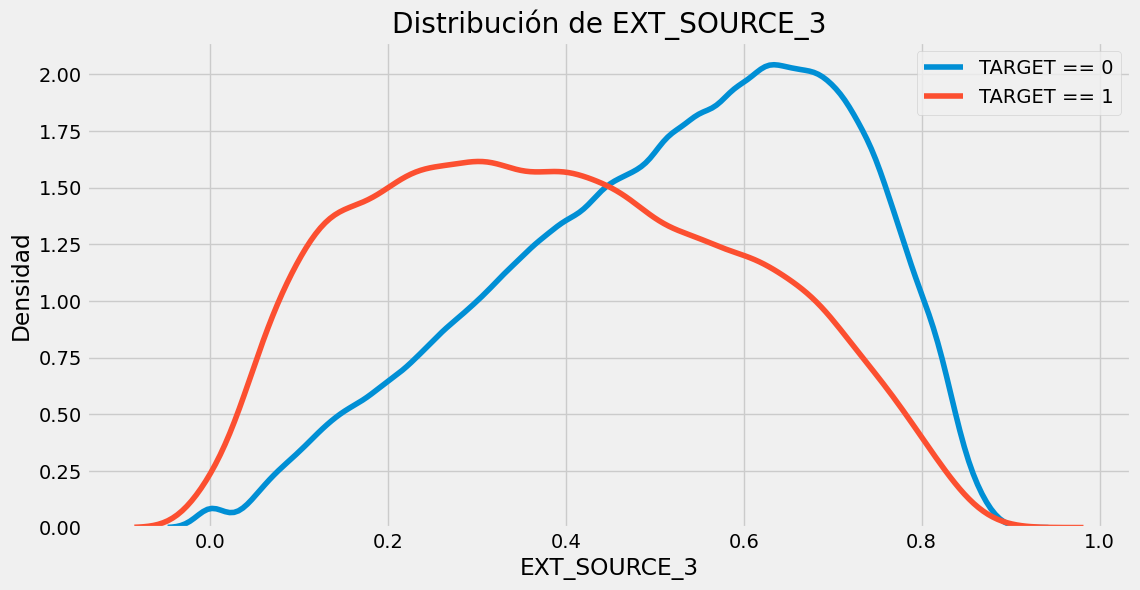

In [11]:
# Función para trazar la distribución de una variable, coloreada por el valor del objetivo
def kde_target(var_name, df):

    # Calcular el coeficiente de correlación entre la nueva variable y el objetivo
    corr = df['TARGET'].corr(df[var_name])

    # Calcular las medianas para pagos y no pagos
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()

    # Crear una figura con tamaño personalizado
    plt.figure(figsize=(12, 6))

    # Trazar la distribución para TARGET == 0 y TARGET == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label='TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label='TARGET == 1')

    # Etiquetar la gráfica
    plt.xlabel(var_name)
    plt.ylabel('Densidad')
    plt.title('Distribución de %s' % var_name)
    plt.legend()

    # Imprimir la correlación
    print('La correlación entre %s y el TARGET es %0.4f' % (var_name, corr))
    # Imprimir los valores promedio
    print('Mi valor medio para préstamos no devueltos = %0.4f' % avg_not_repaid)
    print('Mi valor medio para préstamos devueltos =     %0.4f' % avg_repaid)

# Ahora, puedo ejecutar la función con el siguiente código
kde_target('EXT_SOURCE_3', application_train)


Incluir columnas numéricas
Para incorporar la información numérica en el conjunto de datos de la oficina, podemos derivar estadísticas para cada columna numérica. Este proceso implica agrupar los datos según la identificación del cliente, realizar cálculos sobre el conjunto agrupado y luego fusionar los resultados nuevamente con el conjunto de datos principal.






In [12]:
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).\
            agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                ... DAYS_CREDIT_UPDATE                               \
  mean max min  ...              count        mean  max   min   sum   
0  0.0   0   0  ...                  7  -93.142857   -6  -155  -652   
1  0.0   0   0  ...                  8 -499.875000   -7 -1185 -3999   
2  0.0   0   0  ...                  4 -816.000000  -43 -2131 -3264   
3  0.0   0   0  ...                  2 -532.000000 -382  -682 -1064   
4  0.0   0   0  ...                  3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

Es necesario generar nombres distintos para cada una de estas columnas. El siguiente código se encarga de esta tarea creando nuevos nombres que incorporan la estadística al nombre existente.


In [25]:
# Creo una lista inicial con la columna de identificación del cliente
columns = ['SK_ID_CURR']

# Itero a través de las columnas del marco de datos agrupado de la oficina
for var in bureau_agg.columns:
    # Verifico si la columna actual no es la de identificación del cliente
    if var != 'SK_ID_CURR':
        # Agrego el nuevo nombre de columna que incorpora el prefijo "bureau_"
        columns.append('bureau_%s' % var)

# Asigno la lista de nombres de columnas como los nombres de columna del marco de datos agrupado de la oficina
bureau_agg.columns = columns


In [26]:

# Combino los datos del marco de datos de la aplicación con el marco de datos agrupado de la oficina
application_train = application_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_bureau_bureau_DAYS_CREDIT_UPDATE_count,bureau_bureau_bureau_DAYS_CREDIT_UPDATE_mean,bureau_bureau_bureau_DAYS_CREDIT_UPDATE_max,bureau_bureau_bureau_DAYS_CREDIT_UPDATE_min,bureau_bureau_bureau_DAYS_CREDIT_UPDATE_sum,bureau_bureau_bureau_AMT_ANNUITY_count,bureau_bureau_bureau_AMT_ANNUITY_mean,bureau_bureau_bureau_AMT_ANNUITY_max,bureau_bureau_bureau_AMT_ANNUITY_min,bureau_bureau_bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


Debemos generar nombres distintos para cada una de estas columnas. El código subsiguiente realiza esta tarea añadiendo la estadística al nombre.

In [28]:
new_corrs = []

for col in columns:
    corr = application_train['TARGET'].corr(application_train[col])
    new_corrs.append((col, corr))
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_bureau_bureau_DAYS_CREDIT_mean', 0.08972896721998114),
 ('bureau_bureau_bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_bureau_bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968673),
 ('bureau_bureau_bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392077),
 ('bureau_bureau_bureau_DAYS_CREDIT_ENDDATE_sum', 0.0537348956010205),
 ('bureau_bureau_bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758616),
 ('bureau_bureau_bureau_DAYS_CREDIT_max', 0.04978205463997299),
 ('bureau_bureau_bureau_DAYS_ENDDATE_FACT_sum', 0.048853502611115894),
 ('bureau_bureau_bureau_DAYS_CREDIT_ENDDATE_mean', 0.046982754334835494),
 ('bureau_bureau_bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730155),
 ('bureau_bureau_bureau_DAYS_CREDIT_sum', 0.041999824814846716),
 ('bureau_bureau_bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306002),
 ('bureau_bureau_bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329094),
 ('bureau_bureau_bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616024),
 ('bureau_bureau_bureau_D

La correlación entre bureau_bureau_bureau_DAYS_CREDIT_mean y el TARGET es 0.0897
Mi valor medio para préstamos no devueltos = -835.3333
Mi valor medio para préstamos devueltos =     -1067.0000


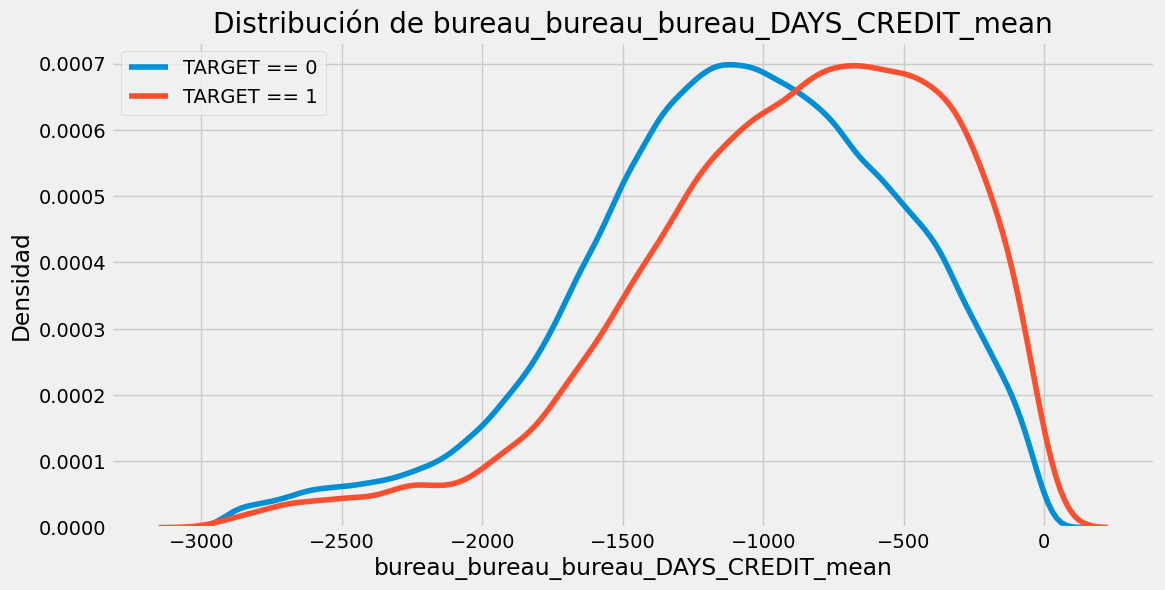

In [36]:
kde_target('bureau_bureau_bureau_DAYS_CREDIT_mean', application_train)

La relación entre la media de los días de crédito en la oficina (bureau_DAYS_CREDIT_mean) y la variable objetivo (TARGET) es de 0.0897. Además, el promedio de los préstamos que no fueron devueltos es de -835.3333, mientras que el promedio de los préstamos que fueron reembolsados es de -1067.0000.